In [1]:
import meegkit
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.fft as sfft
import os

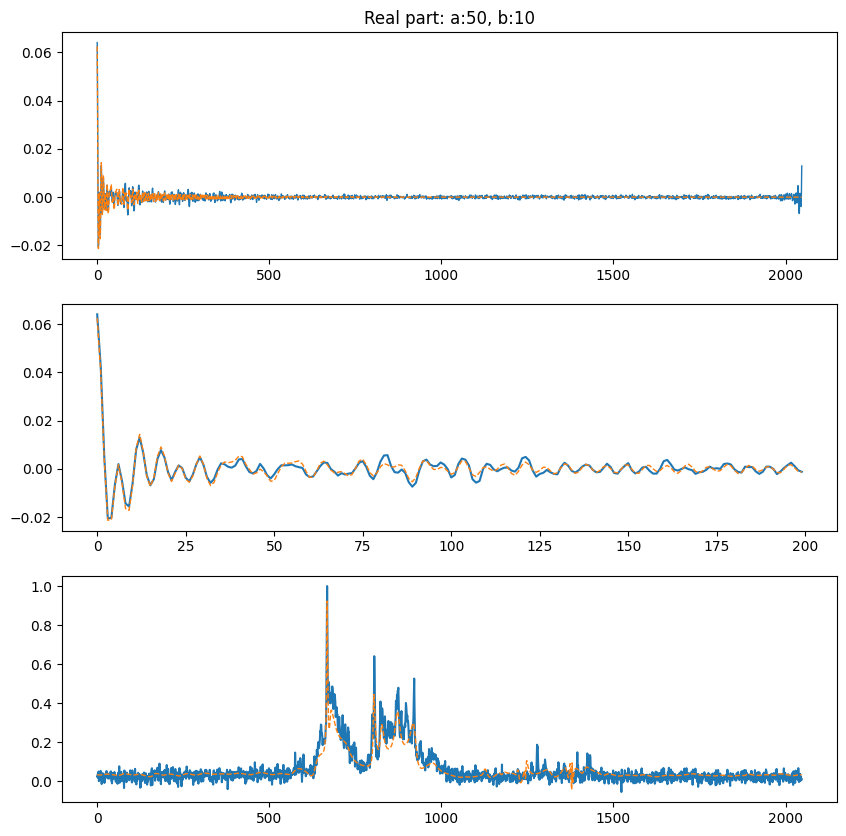

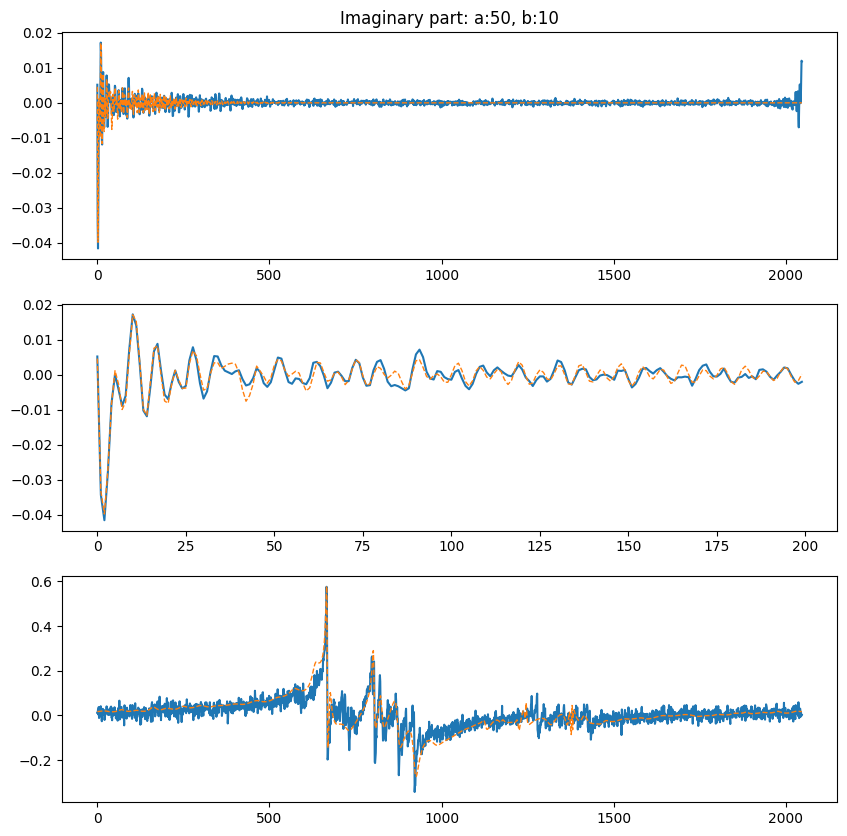

In [5]:
path="/home/stud/casperc/bhome/Project3_DL_sigpros/generated_data/train/TE20_lw03_0001_data.npz"
data = np.load(path)

full_data = data["augmented_ifft"]    
real_part = data["augmented_ifft"].real
imag_part = data["augmented_ifft"].imag
NA = 50
NB = 10

# Real part
B_real, A_real = meegkit.utils.sig.stmcb(real_part, q=NB, p=NA)
_, poles, _ = signal.tf2zpk(B_real, A_real)
assert np.all(np.abs(poles) < 1), "Unstable model (|pole| >= 1). Lower p/q or refit."

sys_real = signal.dlti(B_real, A_real, dt=1)   # dt=1 means unit sample spacing
t, h_real = signal.dimpulse(sys_real, n=2048+NA-NB)
h_real = np.squeeze(h_real)

# imag part
B_imag, A_imag = meegkit.utils.sig.stmcb(imag_part, q=NB, p=NA)
_, poles, _ = signal.tf2zpk(B_imag, A_imag)
assert np.all(np.abs(poles) < 1), "Unstable model (|pole| >= 1). Lower p/q or refit."

sys_imag = signal.dlti(B_imag, A_imag, dt=1)   # dt=1 means unit sample spacing
t, h_imag = signal.dimpulse(sys_imag, n=2048+NA-NB)
h_imag = np.squeeze(h_imag)

h = h_real + 1j * h_imag

plt.figure(1, figsize=(10, 10))
plt.subplot(3,1,1)
plt.title(f"Real part: a:{NA}, b:{NB}")
plt.plot(real_part, linewidth=1)
plt.plot(h_real[NA-NB:], linewidth=1, linestyle='--')
plt.subplot(3,1,2)
plt.plot(real_part[:200])
plt.plot(h_real[NA-NB:200+NA-NB], linewidth=1, linestyle='--')
plt.subplot(3,1,3)
plt.plot(sfft.fftshift(sfft.fft(full_data).real))
plt.plot(sfft.fftshift(sfft.fft(h[NA-NB:]).real), linewidth=1, linestyle='--')

plt.figure(2, figsize=(10, 10))
plt.subplot(3,1,1)
plt.title(f"Imaginary part: a:{NA}, b:{NB}")
plt.plot(imag_part)
plt.plot(h_imag[NA-NB:], linewidth=1, linestyle='--')
plt.subplot(3,1,2)
plt.plot(imag_part[:200])
plt.plot(h_imag[NA-NB:200+NA-NB], linewidth=1, linestyle='--')
plt.subplot(3,1,3)
plt.plot(sfft.fftshift(sfft.fft(full_data).imag))
plt.plot(sfft.fftshift(sfft.fft(h[NA-NB:]).imag), linewidth=1, linestyle='--')
plt.show()